<a href="https://colab.research.google.com/github/syuan0525/project-team/blob/main/oilprice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup
import pandas as pd
import prettytable

In [26]:
url = "https://gas.goodlife.tw/"
req = Request(url,headers={
    "user-agent" : "Mozilla/5.0"
  })
response = urlopen(req)
html = BeautifulSoup(response)

In [27]:
for i in html.find_all("div",id="cpc"):
  s1 = i.find_all("li")[0].find("h3")
  s1.extract()
  s2 = i.find_all("li")[1].find("h3")
  s2.extract()
  s3 = i.find_all("li")[2].find("h3")
  s3.extract()

In [28]:
df = pd.DataFrame(columns=["公司","92油價(每公升)","95油價(每公升)","98油價(每公升)"])
table1 = prettytable.PrettyTable(["公司","92油價(每公升)","95油價(每公升)","98油價(每公升)"])

In [29]:
for i in html.find_all("div",id="cpc"):
  company = i.find("h2").text
  price92 = i.find_all("li")[0].text.replace("\n", "")
  price95 = i.find_all("li")[1].text.replace("\n", "")
  price98 = i.find_all("li")[2].text.replace("\n", "")
  s = pd.Series([company,price92,price95,price98],index=["公司","92油價(每公升)","95油價(每公升)","98油價(每公升)"])
  s.str.encode(encoding = "utf-8")
  df = df.append(s,ignore_index=True)
  table1.add_row([company,price92,price95,price98])

In [30]:
df

,公司,92油價(每公升),95油價(每公升),98油價(每公升)
0,今日中油油價,30.2,31.7,33.7
1,今日台塑油價,30.2,31.6,33.7


In [33]:
print(table1)

+--------------+----------------+----------------+----------------+
|     公司     | 92油價(每公升) | 95油價(每公升) | 98油價(每公升) |
+--------------+----------------+----------------+----------------+
| 今日中油油價 |      30.2      |      31.7      |      33.7      |
| 今日台塑油價 |      30.2      |      31.6      |      33.7      |
+--------------+----------------+----------------+----------------+


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 20170 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 26085 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 20013 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 27833 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 20729 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 21488 missing from current font.
  font.set_

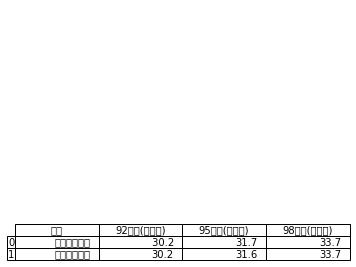

In [32]:
import matplotlib.pyplot as plt
import pandas as pd
from pandas.plotting import table

ax = plt.subplot(111, frame_on=False) # no visible frame
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis

table(ax, df)  # where df is your data frame

plt.savefig('mytable.png')